<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sharpe-ratio" data-toc-modified-id="Sharpe-ratio-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sharpe ratio</a></span><ul class="toc-item"><li><span><a href="#Limitations-of-Sharpe-Ratio" data-toc-modified-id="Limitations-of-Sharpe-Ratio-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Limitations of Sharpe Ratio</a></span></li></ul></li><li><span><a href="#Sortino-ratio" data-toc-modified-id="Sortino-ratio-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sortino ratio</a></span></li><li><span><a href="#Wrap-up-all-our-knowledge-into-a-function" data-toc-modified-id="Wrap-up-all-our-knowledge-into-a-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Wrap up all our knowledge into a function</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References:" data-toc-modified-id="References:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References:</a></span></li></ul></div>

# Cryptocurrency Analysis with Python: Exploring Sharpe and Sortino Ratios
Find more tutorials about Computer Vision, Microscopy, Biology and Data Science [here](https://medium.com/@microbioscopicdata)

<p style="text-align: justify;">Welcome back to our tutorial series on Cryptocurrency Analysis with Python! In our previous tutorials, we explored how to use powerful Python libraries such as Matplotlib, mplfinance, and yfinance to load and visualize cryptocurrency data from popular sources like Yahoo Finance. We successfully implemented the Simple Moving Average (SMA) Crossover Strategy, calculated associated trading costs encompassing commissions, spreads, and slippage, and further optimized the strategy by exploring diverse parameter combinations to identify optimal settings.</div>
    
<p style="text-align: justify;">In this tutorial, we will delve into the world of cryptocurrency investment analysis using two powerful and very popular risk-adjusted performance metrics: the <b>Sharpe Ratio</b> and the <b>Sortino Ratio</b>. These extremely useful metrics provide valuable insights into the relationship between risk and return, enabling investors to assess the potential rewards in light of the risks associated with various cryptocurrencies. Using Python we will fetch historical price data, calculate Log Returns, and utilize the Sharpe and Sortino Ratios to evaluate the potential rewards of different cryptocurrencies.</div>

I have prepared a Jupyter Notebook to accompany this blog post, which can be viewed in my GitHub.


<p style="text-align: justify;">Disclaimer: I am not a trader and this blog post is not financial advice. This is purely introductory knowledge. Past results are not always predictive of future results. All investment-related queries should be directed to your financial advisor.</div>

In [1]:
symbol = ["BTC-USD","ETH-USD","USDT-USD","BNB-USD","XRP-USD","DOGE-USD","ADA-USD","SOL-USD","DOT-USD","SHIB-USD","MATIC-USD","TRX-USD","LTC-USD"]

## Sharpe ratio
<p style="text-align: justify;">The Sharpe ratio, developed by William Sharpe in 1966, has become a widely cited metric for assessing risk and return in finance.  Its widespread use can be largely attributed to its simplicity. The Sharpe ratio acceptance was further increased when Dr. William Sharpe  was awarded the Nobel [1].</div>


<p style="text-align: justify;">The Sharpe ratio  provides a clear method for assessing the trade-off between returns and volatility (for more information about Volatility and Returns please here) when holding a riskier asset. This ratio quantifies the additional compensation/reward we should expect for assuming the higher risk associated with not holding a risk-free asset. A risk-free asset is one that has a certain future return—and virtually no possibility of loss.  In finance, it serves as a benchmark for assessing the performance of other investments, including stocks and, naturally, cryptocurrencies. Traders frequently use the return on a risk-free asset, such as the yield on a government bond, as a reference point.</div>
    
    It's important to note that in practice, truly risk-free assets are rare, and there is always some degree of uncertainty in the financial markets.

![Sharpe Ratio](sharpe1.jpg)

<p style="text-align: justify;">In the given formula, <b>Ra</b> represents the performance of the asset being evaluated. It denotes the historical average return over a specific period. <b>Rf</b> represents the risk-free rate, which pertains to the return on assets with exceptionally low or virtually nonexistent risk, such as government bonds. For the sake of simplicity in this tutorial, <b>Rf</b> will be set to 0. The symbol <b>σ</b> represents the standard deviation of the asset's return (this value can also be interpreted as the measure of variability in the asset's returns. </div>
    
<p style="text-align: justify;">Generally, we accept that the higher the Sharpe Ratio is, the better the risk-adjusted performance of the investment is. The typical Sharpe Ratio for the S&P500 index over ten years is around 0.5 [2].A typical diversified portfolio often achieves a range of 0.75 to 1. We consider portfolios with ratios surpassing 1 up to around 2 as demonstrating exceptional performance. Additionally, it's noteworthy that nearly all investment strategies delivering a Sharpe Ratio exceeding 2 are typically found in the domain of high-frequency trading [2].</div>  
      

<p style="text-align: justify;">The code below retrieves the historical price data for the specified cryptocurrency symbols using the yfinance library, extracts the closing prices of the cryptocurrencies, calculates the  Log Returns (for more informations on Log Returns please see here), annualized average  Log Returns, and annualized standard deviation of  Log Returns. We then sets the risk-free rate to 0 and creates a summary DataFrame that calculates and adds the Sharpe Ratio.</div>

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the cryptocurrency symbols and the date range
ticker=["BTC-USD","ETH-USD","XRP-USD","DOGE-USD","ADA-USD"]
start_date = '2019-01-01'
end_date = '2023-08-08'

# Retrieve the historical price data for the specified cryptocurrency symbols
data = yf.download(ticker, start=start_date, end=end_date)
# Extract the closing prices of the cryptocurrencies
df =data["Close"]

# Handling zero or negative values
df = df.replace(0, np.nan)  # Replace zeros with NaN

Log_Returns= np.log(df.div(df.shift()))# Calculate Log-Returns
Log_Returns.dropna(inplace=True)

# Calculate the annualized average log return
ann_returns = Log_Returns.mean() * 365.25
# Calculate the annualized standard deviation of log returns
ann_std =  Log_Returns.std() * np.sqrt(365.25)

# For the sake of simplicity in this tutorial, rf is set to 0
rf =0

# Creating Summary DataFrame
summary = pd.DataFrame(data={"A. Returns":ann_returns,"A. Risk":ann_std })
# Calculating and Adding Sharpe Ratio
summary["Sharpe Ratio"] = (ann_returns -rf) / ann_std
summary.sort_values(by ="Sharpe Ratio", ascending=False) #Sorting the DataFrame by Sharpe Ratio

[*********************100%***********************]  5 of 5 completed


,A. Returns,A. Risk,Sharpe Ratio
BTC-USD,0.440979,0.695845,0.633731
ETH-USD,0.557538,0.894840,0.623059
DOGE-USD,0.744878,1.414895,0.526455
ADA-USD,0.417741,1.024695,0.407673
XRP-USD,0.116071,1.073474,0.108126


<p style="text-align: justify;">In the analysis above, all of the listed cryptocurrencies have Sharpe Ratios below 1, suggesting that the excess return they offer is relatively low compared to the associated risk. Examining the Dataframe, <B>Bitcoin (BTC-USD)</B> has the highest Sharpe Ratio among the selected cryptocurrencies, indicating that, in this analysis, it offers the most attractive risk-adjusted returns. Conversely, <B>XRP (XRP-USD)</B> has the lowest Sharpe Ratio, indicating a relatively less appealing risk-adjusted performance.</div>

<p style="text-align: justify;">We can also create a scatter plot to visualize the relationship between the annualized risk (standard deviation of log returns) and the annualized average Log Returns of different cryptocurrencies (Sharpe Ratio). The code below displays the risk-return profile of different cryptocurrencies.Cryptocurrencies with higher positions on the y-axis have higher potential returns, while those with lower positions on the x-axis have lower risk. The slope of the scatter plot visually demonstrates the risk-return trade-off for different assets.</div>

C:\Users\Alexandros\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'Annualized Average Log Returns')

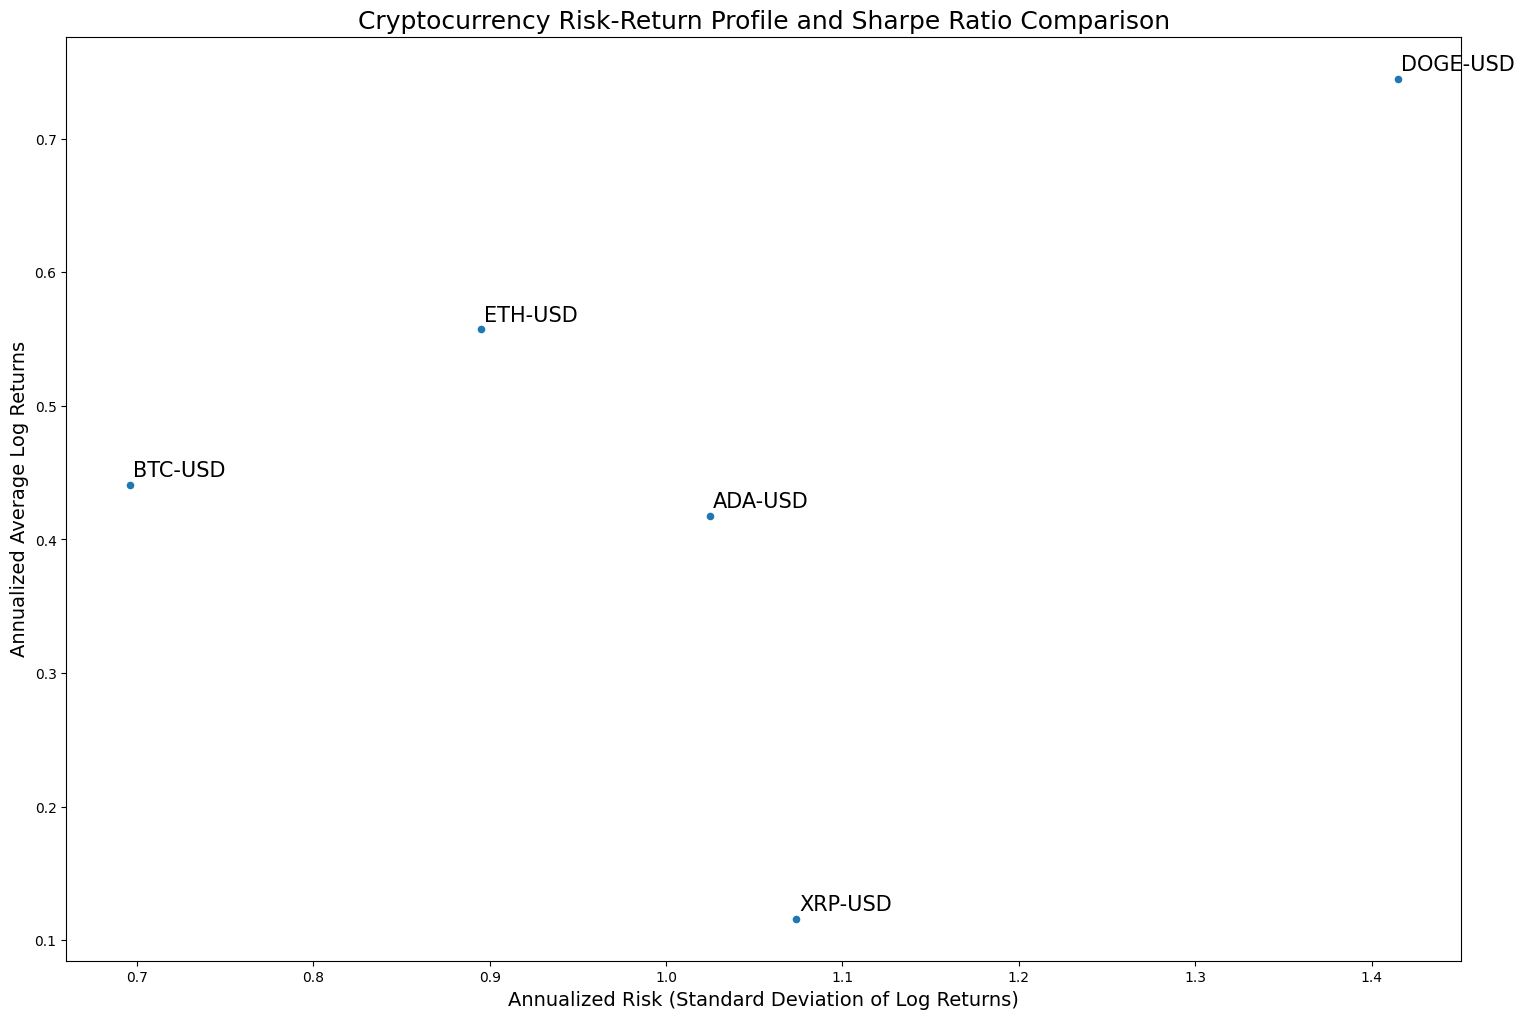

In [3]:
# Create a scatter plot to visualize the risk-return profile of different cryptocurrencies
summary.plot(kind="scatter", x="A. Risk", y="A. Returns", figsize=(18,12))

# Annotate each point on the scatter plot with the cryptocurrency ticker symbol
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,"A. Risk"]+0.002,summary.loc[i,"A. Returns"]+0.006 ), size =15)
    
plt.title("Cryptocurrency Risk-Return Profile and Sharpe Ratio Comparison", fontsize=18)
plt.xlabel("Annualized Risk (Standard Deviation of Log Returns)", fontsize=14)
plt.ylabel("Annualized Average Log Returns", fontsize=14)

### Limitations of Sharpe Ratio

There are several limitations with the usage of Sharpe Ratio [3].  

- The calculation of Sharpe ratio pivots on the assumption that returns are normally distributed, but in real market scenarios, the distribution might suffer from kurtosis and fatter tails, which decreases the relevance of its use. 


- Another notable drawback of Sharpe ratio is that it cannot distinguish between upside and downside and focuses on volatility but not its direction (punishing high volatility in a portfolio). To understand better, recall that if our standard deviation gets higher and higher then the Sharpe ratio is going to decrease as that denominator gets larger. 

**But is volatility always bad?**

**What about a cryptocurrency that is highly volatile in the upwards direction and just constantly has large jump supwards and has a higher and higher stock price? Should we really be punishing the ratio just because it has large, sudden jumps upward?**



In 1994, Frank Sortino and Lee Price published the paper entitled `Performance Measurement and a Downside Risk` [4] in the Journal of Investing. Sortino and Price argued that risk is not synonymous with uncertainty and conclude that is not a huge risk if you have a lot of volatility in the upwards direction, you really are must be concerned with the downside volatility.
So, practically they argue that investors should really care about downside risk and accept volatility or uncertainty on the upside.

## Sortino ratio

**How can we mathematically incorporate the consideration of only downside risk?**

<p style="text-align: justify;">We accomplish this by establishing a threshold for volatility. The approach is rather straightforward, the Sortino ratio: we exclusively consider the volatility, which is the standard deviation for Log Returns below the designated threshold. In practice, this threshold is commonly set at zero [5], that means we're only going to take into account the downside volatility. </div>

![Sortino Ratio](sortino.jpg)

<p style="text-align: justify;">In the given formula, Ra represents the performance of the asset being evaluated. It denotes the historical average return over a specific period. Rf represents the risk-free rate, which pertains to the return on assets with exceptionally low or virtually nonexistent risk, such as government bonds. For the sake of simplicity in this tutorial, Rf will be set to 0. The symbol <b>σd</b>, represents the standard deviation in the downside direction (if you set your threshold to zero). This implies that we analyze all our daily Log-Returns and exclusively select those falling below the designated threshold, which, in the case of a zero threshold, corresponds to days with losses or negative percentage declines. Consequently, you isolate these instances of negative percentage days and compute the standard deviation in that specific direction. This calculation yields a Sortino ratio, a metric that distinctly focuses on assessing downside risk, as opposed to merely penalizing for volatility in both upward and downward directions.</div>

The code below calculates the Sortino Ratio for each cryptocurrency. It calculates the annualized average Log-Return (`ann_returns`), the annualized standard deviation of log returns (`ann_std`), and the annualized standard deviation of downside returns (`downside_ann_std`), which are the essential components needed to calculate the Sortino Ratio.

<p style="text-align: justify;">The Sortino Ratio is then computed and added to the summary DataFrame. The code is sorting the DataFrame by the Sortino Ratio in descending order, which helps you identify which cryptocurrencies have the highest Sortino Ratios and potentially better risk-adjusted performance.</div>



In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the cryptocurrency symbols and the date range
ticker=["BTC-USD","ETH-USD","XRP-USD","DOGE-USD","ADA-USD"]
start_date = '2019-01-01'
end_date = '2023-08-08'

# Retrieve the historical price data for the specified cryptocurrency symbols
data = yf.download(ticker, start=start_date, end=end_date)
# Extract the closing prices of the cryptocurrencies
df =data["Close"]

# Handling zero or negative values
df = df.replace(0, np.nan)  # Replace zeros with NaN

Log_Returns= np.log(df.div(df.shift()))# Calculate Log-Returns
Log_Returns.dropna(inplace=True)

# Calculate the annualized average log return
ann_returns = Log_Returns.mean() * 365.25
# Calculate the annualized standard deviation of log returns
ann_std =  Log_Returns.std() * np.sqrt(365.25)

# Select the Log Returns values that are below zero (negative returns)
downside = Log_Returns[Log_Returns<0]
# Calculate the annualized standard deviation of downside returns
downside_ann_std =  downside.std() * np.sqrt(365.25)

# For the sake of simplicity in this tutorial, rf is set to 0
rf =0

# Creating Summary DataFrame
summary = pd.DataFrame(data={"A. Returns":ann_returns,"A. Risk":ann_std })
# Calculating and Adding Sortino Ratio
summary["Sortino Ratio"] = (ann_returns -rf) / downside_ann_std
summary.sort_values(by ="Sortino Ratio", ascending=False) #Sorting the DataFrame by Sortino Ratio

[*********************100%***********************]  5 of 5 completed


,A. Returns,A. Risk,Sortino Ratio
DOGE-USD,0.744878,1.414895,0.868555
BTC-USD,0.440979,0.695845,0.781310
ETH-USD,0.557538,0.894840,0.762766
ADA-USD,0.417741,1.024695,0.575757
XRP-USD,0.116071,1.073474,0.142940


<p style="text-align: justify;">Comparing the Sharpe Ratio values to the Sortino Ratio values, DOGE-USD has a higher Sortino Ratio than BTC-USD, indicating that DOGE-USD has a better risk-adjusted return when considering only downside risk. However, BTC-USD has a higher Sharpe Ratio than DOGE-USD, indicating that BTC-USD has a better risk-adjusted return when considering both upside and downside risk.This difference in ranking can be explained by the fact that the Sharpe Ratio considers both positive and negative returns, while the Sortino Ratio only considers downside risk.</div>

##  Wrap up all our knowledge into a function

- In the code below we wrap up all our knowledge into a function named `ss_ratio`, Briefly, the function takes the start_date, end_date, and `parameters` (a tuple containing cryptocurrency, short-term and long-term SMAs) as input parameters.  


- <p style="text-align: justify;">The function then downloads historical price data for the specified cryptocurrency symbol within the given date range using the yfinance library. It calculates simple returns, log-returns, and creates columns for short-term and long-term moving averages (SMA).</div>  


- <p style="text-align: justify;">Next, it determines the trading positions based on the crossover strategy (1 for buy and 0 for neutral) and calculates trading costs.</div>  


- <p style="text-align: justify;">The function returns a tuple with the last values of Cumulative Strategy Returns net and Cumulative Buy and Hold returns. This will help us compare the final performance of the SMA crossover strategy with the Buy and Hold strategy for our cryptocurency (Ethereum).</div>

In [5]:
def ss_ratio (ticker, start_date, end_date):
    import yfinance as yf
    import mplfinance as mpf
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np


    # Retrieve the historical price data for the specified cryptocurrency symbols
    data = yf.download(ticker, start=start_date, end=end_date)
    df =data["Close"]

    # Handling zero or negative values
    df = df.replace(0, np.nan)  # Replace zeros with NaN

    Log_Returns= np.log(df.div(df.shift()))# Calculate Log-Returns
    Log_Returns.dropna(inplace=True)

    # Calculate the annualized average log return
    ann_returns = Log_Returns.mean() * 365.25
    # Calculate the annualized standard deviation of log returns
    ann_std =  Log_Returns.std() * np.sqrt(365.25)

    # Select the Log Returns values that are below zero (negative returns)
    downside = Log_Returns[Log_Returns<0]
    # Calculate the annualized standard deviation of downside returns
    downside_ann_std =  downside.std() * np.sqrt(365.25)

    # For the sake of simplicity in this tutorial, rf is set to 0
    rf =0

    # Creating Summary DataFrame
    summary = pd.DataFrame(data={"A. Returns":ann_returns,"A. Risk":ann_std }, index=ticker)
    # Calculating and Adding Sortino & Sharpe Ratio
    summary["Sharpe Ratio"] = (ann_returns -rf) / ann_std
    summary["Sortino Ratio"] = (ann_returns -rf) / downside_ann_std
    summary.sort_values(by ="Sortino Ratio", ascending=False) #Sorting the DataFrame by Sortino Ratio
    return summary.sort_values(by ="Sortino Ratio", ascending=False) #Sorting the DataFrame by Sortino Ratio


In [6]:
ss_ratio(["BTC-USD","ETH-USD","XRP-USD","DOGE-USD","ADA-USD"],'2019-01-01','2023-08-08')

[*********************100%***********************]  5 of 5 completed


,A. Returns,A. Risk,Sharpe Ratio,Sortino Ratio
DOGE-USD,0.744878,1.414895,0.526455,0.868555
BTC-USD,0.440979,0.695845,0.633731,0.781310
ETH-USD,0.557538,0.894840,0.623059,0.762766
ADA-USD,0.417741,1.024695,0.407673,0.575757
XRP-USD,0.116071,1.073474,0.108126,0.142940


<p style="text-align: justify;">The ss_ratio function calculates the Sortino and Sharpe Ratios for the list of specified cryptocurrencies over a given time period.</div>

## Conclusions

<p style="text-align: justify;"> 
Throughout this comprehensive tutorial series on Cryptocurrency Analysis with Python, we have delved into the realm of risk-adjusted performance assessment, focusing on two highly influential metrics: the Sharpe Ratio and the Sortino Ratio. However, it is essential for investors, especially in the field of cryptocurrencies, to recognize that while the Sharpe Ratio and Sortino Ratio offer valuable insights into risk and reward, they are just a part of the broader picture. These ratios serve as powerful tools, but they must be used in conjunction with a comprehensive investment strategy to ensure informed and prudent decision-making within the dynamic and evolving landscape of cryptocurrencies.
    
**Remember that while past performance can offer insights, it does not guarantee future results. Always approach cryptocurrency trading with a well-defined strategy, discipline, and a deep understanding of the risks involved. Happy trading!!**


If you enjoy reading stories of this nature and wish to show your support for my writing, you may contemplate becoming a Medium member. By subscribing for just $5 per month, you’ll gain boundless entry to a vast collection of Python guides and Data science articles. Additionally, if you choose to sign up through my referral link, I’ll receive a modest commission at no extra cost to you.



## References:
[1]	“Understanding the Sharpe Ratio,” Investopedia. https://www.investopedia.com/articles/07/sharpe_ratio.asp (accessed Aug. 7, 2023).  

[2]	D. D. FMVA FCCA, “Sharpe Ratio and Risk-Adjusted Returns,” Magnimetrics, Oct. 25, 2020. https://medium.com/magnimetrics/sharpe-ratio-and-risk-adjusted-returns-e92743fda85f (accessed Aug. 5, 2023).  

[3]	“Sharpe Ratio: Calculation, Application, Limitations, and Trading,” Quantitative Finance & Algo Trading Blog by QuantInsti, Dec. 02, 2019. https://blog.quantinsti.com/sharpe-ratio-applications-algorithmic-trading/ (accessed Aug. 8, 2023).  

[4]	F. A. Sortino and L. N. Price, “Performance Measurement in a Downside Risk Framework,” J. Invest., vol. 3, no. 3, pp. 59–64, Aug. 1994, doi: 10.3905/joi.3.3.59.  

[5]	“Python for Finance and Algorithmic Trading with QuantConnect,” Udemy. https://www.udemy.com/course/python-for-finance-and-algorithmic-trading-with-quantconnect/ (accessed Jul. 18, 2023).

